Creating 1000 training Dataset with three features using pandas in python.

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
np.random.seed(42)
training = pd.DataFrame(np.random.randn(1000,3),columns = ['x1','x2','x3'])

training['y'] = np.ones(1000)
midpoints = int(training.shape[0]/2)
training['y'][midpoints:] = 0
trainingAfterShuffle = training.sample(frac = 1)
training





,x1,x2,x3,y
0,0.496714,-0.138264,0.647689,1.0
1,1.523030,-0.234153,-0.234137,1.0
2,1.579213,0.767435,-0.469474,1.0
3,0.542560,-0.463418,-0.465730,1.0
4,0.241962,-1.913280,-1.724918,1.0
...,...,...,...,...
995,-0.960046,-0.122709,0.093372,0.0
996,-1.130204,2.411677,1.516394,0.0
997,0.602118,0.072037,-0.212209,0.0
998,-0.951918,0.077481,0.257753,0.0


Building two layer neural network object..
1 hidden layer and 1 output layer

hidden layer size = 4
output layer size = 1

loss function = SSE

training sample size = (1000X3)

hidden layer input weight matrix (3X4) variable name = pre_active_weights

hidden layer output weight matrix (4X1) variable name = activated_weights

hidden layer and output layers activation function = sigmoid

loss function = SSE()

dot product between two matrices function name = linearDot()

sigmoid derivative function = sigder()






C:\Users\Granite\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


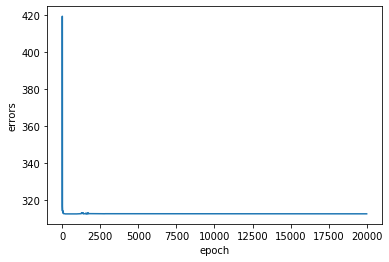

In [2]:
def dimensions(x):
    for i in x:
        print(i.shape)



class neural_network:
    def __init__(self,feature_size,inputs,hidden_layer_size,output_layer_size,loss_function):
        self.feature_size = feature_size
        self.inputs = inputs   #training set
        self.y = inputs[:,self.feature_size]
        self.y = np.reshape(self.y,(1000,1))
        self.output_layers = output_layer_size
        self.loss_func = loss_function
        self.y_pred = []
        self.inputs = np.delete(self.inputs,self.feature_size,1)
        instances = self.inputs.shape[0]
        self.pre_active_weights = np.random.randn(self.feature_size,hidden_layer_size)
        self.activated_weights = np.random.randn(hidden_layer_size,self.output_layers)
        self.preActive = []
        self.trainerrors = []
        self.testerrors = []
    
    def sigmoid(self,X):
        val = 1/(1+np.exp(-X))
        return val*(1-val)

    def sigder(self,X):
        return X*(1-X)
    
    def linearDot(self,X,W):
        return np.dot(X,W)
    
    
    def SSE(self,y,y_pred):
        errors = (y-y_pred)**2
        return np.sum(errors)
    
    def softmax(X):
        shiftx = X - np.max(X)
        exps = np.exp(shiftx)
        return exps / np.sum(exps)
    
    def crossEntropyLoss(output,label):
        return output-label
    
    def trainForSoftMax(self,traindata,lr,epoch,hot_label):
#           --------------forward propagation-----------------
            self.preActive = self.linearDot(self.inputs, self.pre_active_weights)
            sigmoided = self.sigmoid(self.preActive)
            self.y_pred = self.linearDot(sigmoided,self.activated_weights)
            self.y_pred_sigmoid = self.sigmoid(self.y_pred)
            softmax = softmax(self.y_pred_sigmoid)
            dloss_da = softmax-hot_label
             
    
    
    def train(self,lr,epoch):
        
        for i in range(epoch):
            
           
            
            
#           --------------forward propagation-----------------
            self.preActive = self.linearDot(self.inputs, self.pre_active_weights)
            sigmoided = self.sigmoid(self.preActive)
            self.y_pred = self.linearDot(sigmoided,self.activated_weights)
            self.y_pred_sigmoid = self.sigmoid(self.y_pred)

#           --------------error calculation----------------
            
            errors = self.SSE(self.y,self.y_pred_sigmoid)

#           --------------gradient calculation and backpropagation----------
            derrors_dyps = -2*np.sum(self.y-self.y_pred_sigmoid)
            derrors_dyps = np.reshape(derrors_dyps,(1,1))
            dyps_dyp = self.sigder(self.y_pred_sigmoid)
            dyp_dw_active = sigmoided
        
            dyp_ds = self.activated_weights
            ds_dz = self.sigder(sigmoided)
            dz_dw_pre = self.inputs.T
            derrors_dyp = np.dot(dyps_dyp,derrors_dyps)
            derrors_dw_act =np.dot(sigmoided.T,derrors_dyp)
            derrors_dw_pre = np.dot(dz_dw_pre,np.dot(derrors_dyp,dyp_ds.T))
        
#           updating weights
            self.activated_weights -= lr*derrors_dw_act
            self.pre_active_weights -= lr*derrors_dw_pre

#           storing error values for plotting
            self.trainerrors.append(errors)
            

        
    
    
        
    
    def test(self,testData,y):
        pre = self.linearDot(testData, self.pre_active_weights)
        sigmoided = self.sigmoid(pre)
        y_pred = self.linearDot(sigmoided,self.activated_weights)
        
        y_pred_sigmoid = self.sigmoid(y_pred)
        
        errors = self.SSE(y,y_pred_sigmoid)
        self.testerrors.append(errors)
        
    
        
        
        
        
inputs = training.to_numpy()          
nn = neural_network(feature_size = 3,inputs = inputs,
                    hidden_layer_size = 4,output_layer_size = 1,
                    loss_function = 'SSE')
epoch = 20000
nn.train(0.0003,epoch)
iteration = [i for i in range(epoch)]
plt.xlabel('epoch')
plt.ylabel("errors")
plt.plot(iteration,nn.trainerrors)



        

creating test dateset....


In [3]:
testing = pd.DataFrame(np.random.randn(100,3),columns = ['x1','x2','x3'])

testing['y'] = np.ones(100)
midpoints = int(testing.shape[0]/2)
testing['y'][midpoints:] = 0
testing = testing.sample(frac = 1)
label = testing['y'].to_numpy()
label = np.reshape(label,(100,1))
testing = np.delete(testing.to_numpy(),testing.shape[1]-1,1)

# testing  = np.delete(testing)
# # testing = np.delete(testing,4,1)
# # testing



forward propagating the test dataset 

In [4]:
nn.test(testing,label)
for x in nn.testerrors:
    print("testloss using SSE: ", x)

testloss using SSE:  31.25


C:\Users\Granite\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


Modifying the training dataset for classification using softmax  cross entropy loss.
We are gonna use one hot label encoding to classify two different classes


In [5]:
# training = training.drop('y',axis = 1)
training
x1 = np.tile(np.array([1,0]),(500,1))
x2 = np.tile(np.array([0,1]),(500,1))
labels = np.vstack((x1,x2))
labels.shape

training= training.to_numpy()
trainingset = np.append(training,labels,axis = 1)



In [6]:
trainingset = np.append(training,labels,axis = 1)

In [7]:
np.random.shuffle(trainingset)

In [8]:
trainingset.shape

(1000, 6)

In [9]:
hotencoding = np.array(list(zip(trainingset[:,4],trainingset[:,5])))

In [10]:
hotencoding

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])